# Geospatial

In [4]:
import sys
sys.path.append("../")
import mwdata as mw
from mwdata.geospatial.mapping import maps

## Data preprocessing
- Use load_data to load in the shapefile and csv file
- Merge the two files on their GEO ID 
- Extract the state names from 'Geographic area' and save the data in a new column called 'state'
- Remove rows where the state values are Hawaii and Alaska, so that the map would scale proportionally 

In [5]:
counties = mw.load_data('../data/geo/tl_2018_us_county.shp')
pop = mw.load_data('../data/geo/DEC_10_SF1_GCTPH1.US05PR_with_ann.csv',
                   kwargs={'encoding':'latin1',
                           'skiprows':1,
                           'dtype':{'Target Geo Id2': str}})
geo = counties.merge(pop, left_on='GEOID', right_on='Target Geo Id2')
geo['state'] = geo['Geographic area'].map(lambda x: x.split('-')[1].strip())
geo = geo[~geo['state'].isin(['Hawaii','Alaska'])]

## Default choropleth map with color selected 

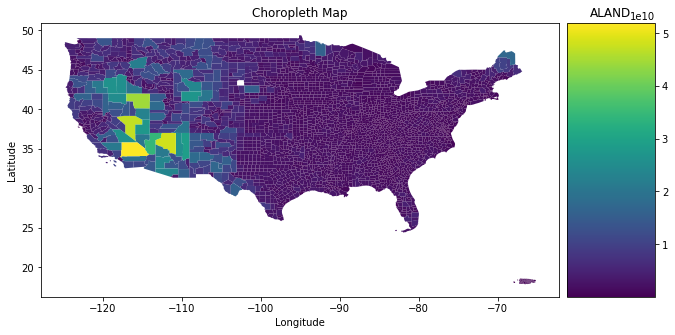

In [6]:
maps(geo,color="ALAND")

## Default choropleth map without selecting color

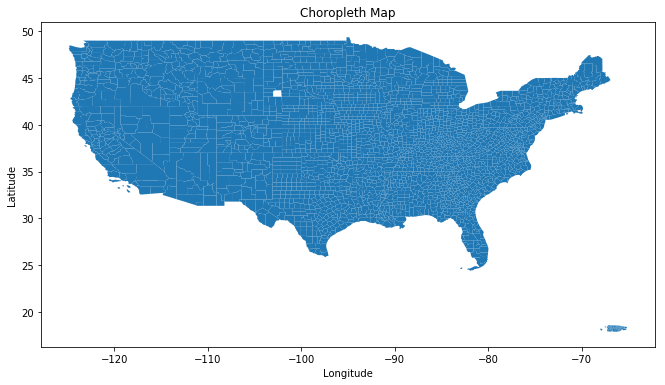

In [7]:
maps(geo)

## KDE map 

..\mwdata\geospatial\mapping.py:41: UserWarning:

Large number of rows, processing will take awhile



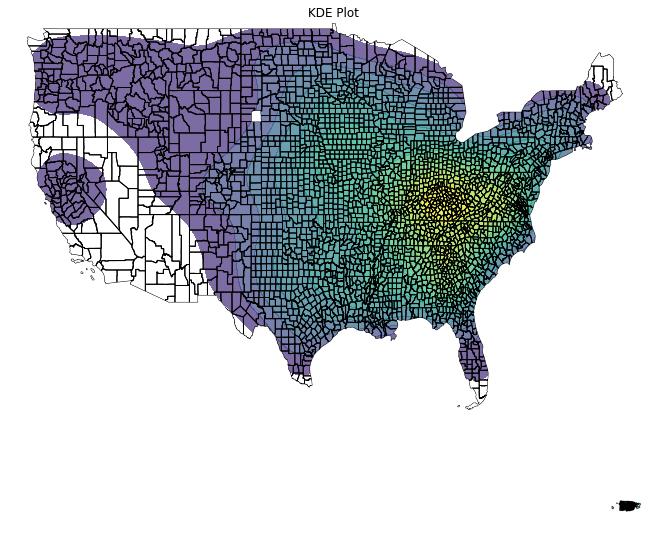

In [8]:
maps(data=geo, type="kde")